### **Handling missing values**

---


#### **1. Complete Case Analysis (CCA)**


Applicable only if the data is-

* Missing Completely at Random (MCAR)
* Dropping the data does not change the distribution of the data


In [1]:
import os
import pandas as pd


path = os.path.join("..", "data", "data_science_job.csv")
df = pd.read_csv(path)
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
18560,23712,city_143,0.740,Male,No relevent experience,no_enrollment,Masters,STEM,14.0,1000-4999,NGO,96.0,0.0
11270,11027,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,33.0,0.0
4373,4435,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,NaN,NaN,NaN,0.0
18401,3236,city_104,0.924,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Pvt Ltd,114.0,0.0
19075,27194,city_103,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,14.0,100-500,Pvt Ltd,49.0,0.0


In [2]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [3]:
new_df = df.dropna(subset=["city_development_index", "experience"])

<Axes: xlabel='experience', ylabel='Density'>

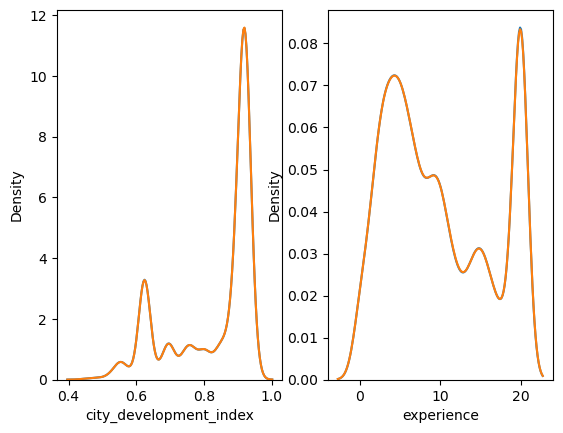

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, (first, second) = plt.subplots(ncols=2)

sns.kdeplot(df, x="city_development_index", ax=first)
sns.kdeplot(new_df, x="city_development_index", ax=first)
sns.kdeplot(df, x="experience", ax=second)
sns.kdeplot(new_df, x="experience", ax=second)

---


#### **2. Imputation**


##### **1. Univariate**


**i. Numerical Data**


* **Mean-Median Imputation**

Use mean imputation if the data is normally distributed, 
use median imputation if the data is skewed.

Disadvantages-

* changes the distribution
* creates outliers
* changes the correlation and covariance of the data


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"]
)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ("mean", SimpleImputer(strategy="mean"), ["city_development_index"]),
        ("median", SimpleImputer(strategy="median"), ["experience"]),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean', SimpleImputer(),
                                 ['city_development_index']),
                                ('median', SimpleImputer(strategy='median'),
                                 ['experience'])])

In [7]:
new_df = ct.fit_transform(df)
new_df.sample(5)

,mean__city_development_index,median__experience,remainder__enrollee_id,remainder__city,remainder__gender,remainder__relevent_experience,remainder__enrolled_university,remainder__education_level,remainder__major_discipline,remainder__company_size,remainder__company_type,remainder__training_hours,remainder__target
2320,0.920,20.0,4379,city_103,Male,Has relevent experience,no_enrollment,Graduate,Arts,5000-9999,NGO,90.0,0.0
6126,0.920,7.0,17635,city_103,Female,No relevent experience,no_enrollment,Phd,Humanities,NaN,NaN,43.0,1.0
1693,0.913,20.0,8634,city_61,Male,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,50.0,0.0
961,0.920,6.0,26974,city_103,Male,Has relevent experience,Full time course,High School,NaN,100-500,Funded Startup,167.0,0.0
12023,0.855,4.0,31725,city_67,Female,Has relevent experience,no_enrollment,Graduate,STEM,<10,NaN,5.0,0.0


---


* **Arbitrary Value Imputation**

Replace missing values with some arbitrary value not present within the dataset.
Done to distinguish missing values in the dataset.


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "random_value",
            SimpleImputer(strategy="constant", fill_value=100),
            ["city_development_index", "experience"],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('random_value',
                                 SimpleImputer(fill_value=100,
                                               strategy='constant'),
                                 ['city_development_index', 'experience'])])

In [9]:
new_df = ct.fit_transform(df)
new_df.sample(5)

,random_value__city_development_index,random_value__experience,remainder__enrollee_id,remainder__city,remainder__gender,remainder__relevent_experience,remainder__enrolled_university,remainder__education_level,remainder__major_discipline,remainder__company_size,remainder__company_type,remainder__training_hours,remainder__target
12408,0.550,4.0,13332,city_11,Male,Has relevent experience,Part time course,Graduate,STEM,<10,NGO,25.0,1.0
17325,0.624,6.0,30200,city_21,Male,Has relevent experience,no_enrollment,Graduate,STEM,10000+,Pvt Ltd,13.0,0.0
16960,0.920,20.0,11183,city_160,Female,Has relevent experience,no_enrollment,Graduate,STEM,100-500,Pvt Ltd,42.0,0.0
16999,0.910,8.0,15934,city_16,NaN,Has relevent experience,no_enrollment,Masters,STEM,100-500,Pvt Ltd,60.0,0.0
18314,0.920,19.0,16122,city_103,NaN,Has relevent experience,no_enrollment,Masters,STEM,10000+,Pvt Ltd,46.0,0.0


---


* **End of distribution Imputation**


Same as random value imputation, just the random value is replaced with the end values of their distribution.

For normally distributed data, 

# $$ upper\_limit = \mu + (3 * \sigma) $$

# $$ lower\_limit = \mu - (3 * \sigma) $$

For skewed data, 

# $$ upper\_limit = Q_3 + (1.5 * IQR) $$

# $$ lower\_limit = Q_1 - (1.5 * IQR) $$

---

* **Random Imputation**

In this technique the missing data is filled with one of the randomly selected values from the non-null data.

- Has little to no effect on the distribution of the data. 
- Increases the randomness of the data, and changes the covariance of data.

---


**ii. Categorical Data**


* **Most frequent value Imputation (Mode)**


This is same as mean and median for numerical data, with the same assumptions and drawbacks.


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("mode", SimpleImputer(strategy="most_frequent"), [])])
ct.set_output(transform="pandas")

ColumnTransformer(transformers=[('mode',
                                 SimpleImputer(strategy='most_frequent'), [])])

---


* **Missing category Imputation**


Same as arbitrary value imputation, the missing values are replaced with the keyword **"Missing"** or something along those lines to distinguish missing data points.


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "missing_category",
            SimpleImputer(strategy="constant", fill_value="Missing"),
            [],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('missing_category',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 [])])

---


##### **2. Multivariate**


**i. KNN Imputer**


Fill the missing data with the average of the data present in the "k-nearest" rows, calculated by KNN algorithm.

The distance here is **nan-euclidean distance**, given as -

**dist(x,y) = sqrt(weight * sq. distance from present coordinates) where, weight = Total # of coordinates / # of present coordinates**

In [2]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "knn_imputer",
            KNNImputer(n_neighbors=5),
            [],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('knn_imputer', KNNImputer(), [])])

---

**ii. Iterative Imputer or Multivariate Imputation by Chained Equations for Missing Value (MICE)**


In [4]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "iter_imputer",
            IterativeImputer(),
            [],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('iter_imputer', IterativeImputer(), [])])

---


#### **3. Missing Indicator**

In this technique, an additional boolean column is added to the dataset to identity missing values.

<img src="../assets/missing_indicator.png"/>

In [1]:
from sklearn.impute import MissingIndicator
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ("missing_ind", MissingIndicator(), [])
    ],remainder="passthrough"
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('missing_ind', MissingIndicator(), [])])

---


### **Auto-select best simple imputation (GridSearchCV)**

#### TODO : Learn GridSearchCV

---